# Ch 01. View Each Separately

When we don't really understand what our data looks like, it's best to look at in smaller chunks. In this first chapter, we separate the five column types(D,S,P,B,R) and take a look at the two-dimensional distribution.

> Table of Contents
```
Step 1. Load Samle Data
Step 2. Separate Data
Step 3. Check Outliers
Step 4. PCA (Focus on 'D' type)
```


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


## Step 1. Load Sample Data


Because the data volume is too large, we will only use 10000 rows in the tutorial.

In [2]:
train_data_path = '/kaggle/input/amex-default-prediction/train_data.csv'
train_label_path = '/kaggle/input/amex-default-prediction/train_labels.csv'

In [3]:
train_iter = pd.read_csv(train_data_path, chunksize=10000)
train_iter

In [4]:
train_sample = train_iter.__next__() # first 10000 rows
train_sample

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-02-26,0.331150,1.472028,0.049780,0.187973,0.000417,0.143625,0.955153,0.099672,...,NaN,NaN,NaN,0.008082,0.002661,0.003676,NaN,0.001279,0.001011,0.008815
9996,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-03-19,0.361060,2.065567,0.048313,0.194930,0.006775,0.144908,1.252287,0.118775,...,NaN,NaN,NaN,0.007419,0.007829,0.000511,NaN,0.008342,0.004060,0.005083
9997,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-03-28,0.708199,0.357349,0.013953,1.002573,0.003448,0.110258,0.170252,0.040633,...,NaN,NaN,NaN,0.009987,0.007548,0.003425,NaN,0.005115,0.007862,0.008078
9998,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-04-15,0.692401,0.009380,0.018337,0.588057,0.001596,0.108820,0.177197,0.031383,...,NaN,NaN,NaN,0.002379,0.006379,0.009408,NaN,0.005702,0.006532,0.003437


Check how many cases are counted for each customer ID

In [5]:
train_sample['customer_ID'].value_counts()

0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
004f7be7f28bebb73f37f089f3d0e235e15d4feba024a4c7ef0577f5dc9b4ff0    13
004ea3a8ddc1b7c5fec84e3216a61022ad5cd48014ef38bee5bf383e3cfd596b    13
004ef04cc6c065db9ae1c91bc98afd248c0f0eb1f8af9de8b525fb1d2cdd405a    13
004f210fc267fadee74094279a45426518c3b0e0e37328d5a82ea0873e1c7e78    13
                                                                    ..
0015d621bacbfd59cc1479aea405645ecb480f6ee779e06d66ce55da3bd397fd     1
007640e6d0fb8423be50a40c337108db80471dae973fc840ee98cdbbbed10038     1
0009bd8871169b8d76a445e1f52079a6edc0b6f0bf021d5ec50ef6aa6487cc14     1
0066a59c8b96adec9e847a64d83d481f8b67eb6b96eac02d52cc021181b9c147     1
004bf15cf65c01b2173e53c5284933d41650e69d977ebd737e0c8cda9af483d8     1
Name: customer_ID, Length: 826, dtype: int64

When unfolding as a two-dimensional distribution, the target will be expressed in color. So, Let's take the target information as well and combine it with our sample data.

In [6]:
train_labels = pd.read_csv(train_label_path)
train_labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [7]:
sample_df = pd.merge(left=train_sample, right=train_labels, on=['customer_ID'], how='left')
sample_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-02-26,0.331150,1.472028,0.049780,0.187973,0.000417,0.143625,0.955153,0.099672,...,NaN,NaN,0.008082,0.002661,0.003676,NaN,0.001279,0.001011,0.008815,1
9996,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-03-19,0.361060,2.065567,0.048313,0.194930,0.006775,0.144908,1.252287,0.118775,...,NaN,NaN,0.007419,0.007829,0.000511,NaN,0.008342,0.004060,0.005083,1
9997,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-03-28,0.708199,0.357349,0.013953,1.002573,0.003448,0.110258,0.170252,0.040633,...,NaN,NaN,0.009987,0.007548,0.003425,NaN,0.005115,0.007862,0.008078,0
9998,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-04-15,0.692401,0.009380,0.018337,0.588057,0.001596,0.108820,0.177197,0.031383,...,NaN,NaN,0.002379,0.006379,0.009408,NaN,0.005702,0.006532,0.003437,0


## Step 2. Separate data

We will check the data separately for each column type. So, Let's separate the columns.

In [8]:
d_cols = list(filter(lambda x : x.startswith("D"), train_sample.columns.tolist()))
s_cols = list(filter(lambda x : x.startswith("S"), train_sample.columns.tolist()))
p_cols = list(filter(lambda x : x.startswith("P"), train_sample.columns.tolist()))
b_cols = list(filter(lambda x : x.startswith("B"), train_sample.columns.tolist()))
r_cols = list(filter(lambda x : x.startswith("R"), train_sample.columns.tolist()))

print(f"number of 'd's : {len(d_cols)}\n",
      f"number of 's's : {len(s_cols)}\n", 
      f"number of 'p's : {len(p_cols)}\n", 
      f"number of 'b's : {len(b_cols)}\n", 
      f"number of 'r's : {len(r_cols)}\n")

number of 'd's : 96
 number of 's's : 22
 number of 'p's : 3
 number of 'b's : 40
 number of 'r's : 28



In [9]:
import warnings
warnings.filterwarnings('ignore')

user_info = sample_df[['customer_ID', 'target']]
ts_info = sample_df[['S_2']]
ts_info['S_2'] = ts_info['S_2'].astype('datetime64')

sample_df_d = sample_df.loc[:,d_cols]
sample_df_d = pd.concat([ts_info, user_info, sample_df_d], axis=1)
sample_df_d.set_index('S_2', inplace=True)
sample_df_d.sort_index(inplace=True)

sample_df_s = sample_df.loc[:,s_cols[1:]]
sample_df_s = pd.concat([ts_info, user_info, sample_df_s], axis=1)
sample_df_s.set_index('S_2', inplace=True)
sample_df_s.sort_index(inplace=True)

sample_df_p = sample_df.loc[:,p_cols]
sample_df_p = pd.concat([ts_info, user_info, sample_df_p], axis=1)
sample_df_p.set_index('S_2', inplace=True)
sample_df_p.sort_index(inplace=True)

sample_df_b = sample_df.loc[:,b_cols]
sample_df_b = pd.concat([ts_info, user_info, sample_df_b], axis=1)
sample_df_b.set_index('S_2', inplace=True)
sample_df_b.sort_index(inplace=True)

sample_df_r = sample_df.loc[:,r_cols]
sample_df_r = pd.concat([ts_info, user_info, sample_df_r], axis=1)
sample_df_r.set_index('S_2', inplace=True)
sample_df_r.sort_index(inplace=True)

print(f"[sample_df_d] number of rows : {len(sample_df_d)}\n",
      f"[sample_df_d] number of cols : {len(sample_df_d.columns)}\n",
      
      f"[sample_df_s] number of rows : {len(sample_df_s)}\n",             
      f"[sample_df_s] number of cols : {len(sample_df_s.columns)}\n", 
      
      f"[sample_df_p] number of rows : {len(sample_df_p)}\n", 
      f"[sample_df_p] number of cols : {len(sample_df_p.columns)}\n", 
      
      f"[sample_df_b] number of rows : {len(sample_df_b)}\n", 
      f"[sample_df_b] number of cols : {len(sample_df_b.columns)}\n", 
      
      f"[sample_df_r] number of rows : {len(sample_df_r)}\n",
      f"[sample_df_r] number of cols : {len(sample_df_r.columns)}\n")

[sample_df_d] number of rows : 10000
 [sample_df_d] number of cols : 98
 [sample_df_s] number of rows : 10000
 [sample_df_s] number of cols : 23
 [sample_df_p] number of rows : 10000
 [sample_df_p] number of cols : 5
 [sample_df_b] number of rows : 10000
 [sample_df_b] number of cols : 42
 [sample_df_r] number of rows : 10000
 [sample_df_r] number of cols : 30



If the data types are the same, the independence between columns is likely to be weak. And if the independence is weak, it is necessary to eliminate some of the highly correlated variables. To check these points, let's check the correlation distribution. The darker the blue color, the lower the independence and the stronger the correlation.

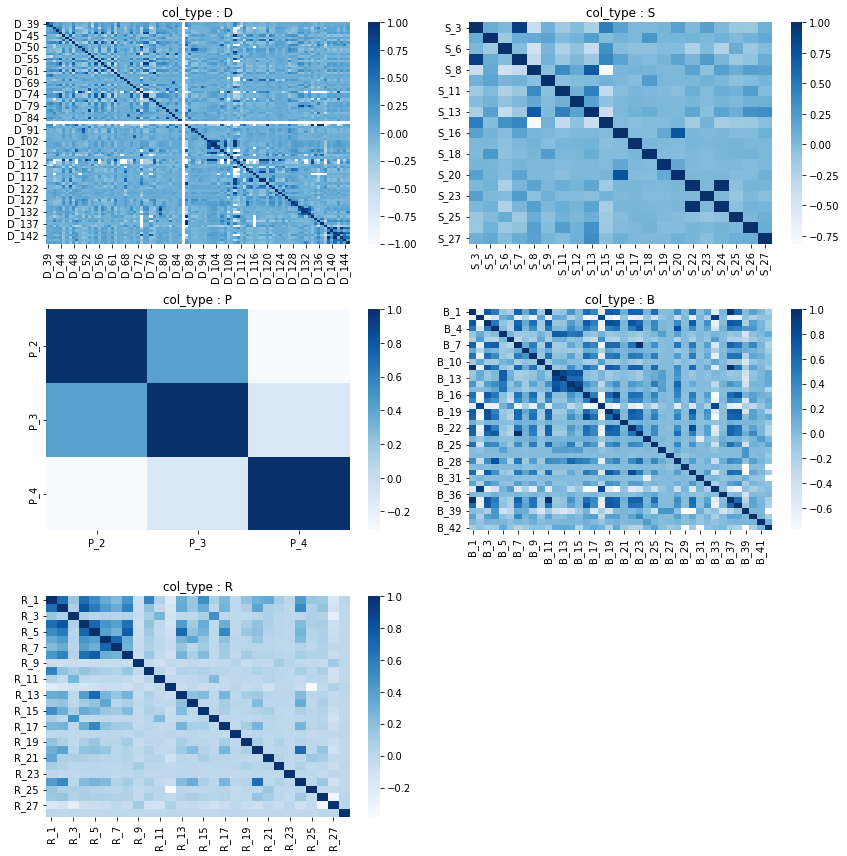

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

plt.subplot(321)
sns.heatmap(sample_df_d.loc[:,d_cols].corr(), cmap='Blues')
plt.title('col_type : D')

plt.subplot(322)
sns.heatmap(sample_df_s.loc[:,s_cols[1:]].corr(), cmap='Blues')
plt.title('col_type : S')

plt.subplot(323)
sns.heatmap(sample_df_p.loc[:,p_cols].corr(), cmap='Blues')
plt.title('col_type : P')

plt.subplot(324)
sns.heatmap(sample_df_b.loc[:,b_cols].corr(), cmap='Blues')
plt.title('col_type : B')

plt.subplot(325)
sns.heatmap(sample_df_r.loc[:,r_cols].corr(), cmap='Blues')
plt.title('col_type : R')

plt.tight_layout()
plt.show()

Considering the amount of variables, it is fortunate that there are not many variables that are related to each other. However, there are several strongly correlated variables. So,Keep in mind that these variables will need to be removed when training the machine learning model later(not this chapter).

## Step 3. Check Outliers

Since it is a matter of matching whether the target is 0 or 1, it is necessary to check the proportion of appearance of 1 for each date. In case of excessive or very rare occurrence, the date can be treated as an outlier, and this outlier may be helpful for our analysis.

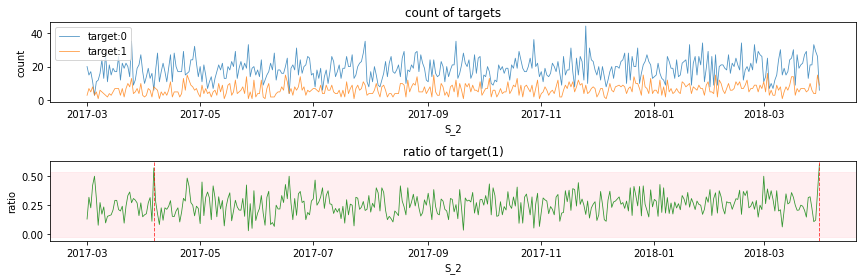

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
daily_cnt_df = pd.DataFrame(sample_df_d.resample('D')['target'].value_counts())
daily_cnt_df.columns = ['count']
daily_cnt_df.reset_index(inplace=True)

plt.subplot(211)
data_0 = daily_cnt_df[daily_cnt_df['target']==0]
sns.lineplot(data=data_0, x='S_2', y='count', linewidth=0.8, alpha=0.8, label='target:0')
data_1 = daily_cnt_df[daily_cnt_df['target']==1]
sns.lineplot(data=data_1, x='S_2', y='count', linewidth=0.8, alpha=0.8, label='target:1')
plt.title('count of targets')

plt.subplot(212)
data_ratio_1 = data_1.set_index('S_2')['count'] / (data_1.set_index('S_2')['count'] + data_0.set_index('S_2')['count'])
sns.lineplot(data=data_ratio_1, linewidth=0.8, alpha=0.8, color='g')
plt.axhspan(ymin=data_ratio_1.mean()-3*data_ratio_1.std(), ymax=data_ratio_1.mean()+3*data_ratio_1.std(), alpha=0.25, color='pink')
v_idx = data_ratio_1[(data_ratio_1 > data_ratio_1.mean()+3*data_ratio_1.std()) | (data_ratio_1 < data_ratio_1.mean()-3*data_ratio_1.std())]
for i in v_idx.index:
    plt.axvline(x=i, color='r', linestyle='--', alpha=0.7, linewidth=0.95)
plt.ylabel('ratio')
plt.title('ratio of target(1)')

plt.tight_layout()
plt.show()

The red area on the `ratio of target(1)` graph indicates values that fall within 3 standard deviations. + and - standard deviations are 99% or more of the section that contains most of the data, and values protruding outside the corresponding range can be judged as outliers.

In [12]:
v_idx # outliers

S_2
2017-04-06    0.571429
2018-03-31    0.600000
Name: count, dtype: float64

## Step 4. PCA (Focus on 'D' type)

In this tutorial, we will analyze 'D' type columns as an example among the five data types divided above.

And Among the categorical variables specified in the guide, the variables corresponding to type D are as follows.

In [13]:
cat_cols = ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

There should be no missing values for PCA. However, since the loss of information is enormous when all missing values are removed, we will fill in the missing values with the median of the average values of each D-type data.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
decomposed_data = pca.fit_transform(sample_df_d.drop(cat_cols,axis=1).iloc[:,2:].fillna(sample_df_d[d_cols].mean().median()))
decomposed_df = pd.DataFrame(data=decomposed_data, columns=['x1','y1'])
decomposed_df

,x1,y1
0,-0.072508,0.414014
1,1.321788,-0.668247
2,-0.093976,-0.762743
3,-0.097180,-0.029490
4,-0.094569,-0.121710
...,...,...
9995,-0.104005,-0.613885
9996,0.168294,1.674835
9997,0.019254,0.545340
9998,-0.104482,1.720740


Now all D-type data has been reduced to two-dimensional data. Let's add target information here.

In [15]:
pd.concat([decomposed_df, sample_df_d['target'].reset_index(drop=True)], axis=1)

,x1,y1,target
0,-0.072508,0.414014,1
1,1.321788,-0.668247,0
2,-0.093976,-0.762743,0
3,-0.097180,-0.029490,0
4,-0.094569,-0.121710,0
...,...,...,...
9995,-0.104005,-0.613885,0
9996,0.168294,1.674835,1
9997,0.019254,0.545340,1
9998,-0.104482,1.720740,1


When this data is spread out on a two-dimensional plane, it looks like the following.

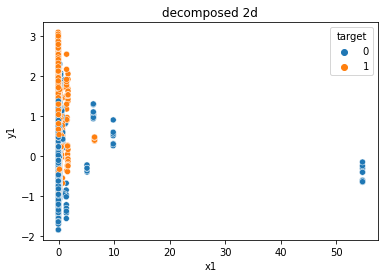

In [16]:
decomposed_2d = pd.concat([decomposed_df, sample_df_d['target'].reset_index(drop=True)], axis=1)
sns.scatterplot(data=decomposed_2d, x='x1', y='y1', hue='target') 
plt.title('decomposed 2d')
plt.show()

It seems that the x-axis values are reduced to discrete. It may be a problem because the existing data values have different scales for each column. Therefore, let's standardize the data and then proceed with dimensionality reduction again.

In [17]:
num_d = sample_df_d.drop(cat_cols,axis=1).iloc[:,2:]
scaled_d = (num_d - num_d.mean()) / num_d.std()
scaled_d.describe()

,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,10000.000000,1.000000e+04,1.355000e+03,6.913000e+03,9.505000e+03,1.000000e+04,7.709000e+03,1.000000e+04,8.697000e+03,1.104000e+03,...,3.720000e+02,3.720000e+02,3.720000e+02,9.847000e+03,9.937000e+03,9.847000e+03,1.572000e+03,9.847000e+03,9.937000e+03,9.847000e+03
mean,0.000000,3.410605e-17,-1.310964e-18,-1.315630e-16,5.382333e-17,-2.287948e-16,1.493163e-16,-5.826450e-17,-1.960794e-17,-2.783603e-16,...,3.820122e-17,1.910061e-17,9.550306e-18,3.535756e-17,8.580570e-18,1.659641e-17,-1.887097e-16,2.597699e-17,-5.309228e-17,2.092591e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.569306,-3.287806e-01,-9.150381e-01,-7.544872e-01,-5.510914e-01,-1.058107e+00,-7.442018e+00,-1.850656e+00,-1.207232e+00,-1.002292e+00,...,-1.114350e+00,-1.513691e-01,-7.097231e-01,-4.494780e-01,-1.728309e-01,-4.497942e-01,-1.517661e+00,-4.467063e-01,-2.661521e-01,-2.548880e-01
25%,-0.552727,-3.135574e-01,-6.727018e-01,-5.550671e-01,-5.338797e-01,-8.328061e-01,-3.529748e-01,-7.707881e-01,-9.367708e-01,-6.221539e-01,...,-1.074683e+00,-1.294909e-01,-6.961367e-01,-4.414527e-01,-1.529784e-01,-4.408272e-01,-8.801417e-01,-4.386556e-01,-2.508036e-01,-2.418189e-01
50%,-0.535606,-2.989905e-01,-2.088348e-01,-3.531593e-01,-5.168539e-01,-2.348523e-01,-1.134069e-01,-1.559857e-01,-2.337783e-01,-2.867371e-01,...,1.150052e-01,-1.026238e-01,-6.835783e-01,-4.331811e-01,-1.335950e-01,-4.321390e-01,-7.244393e-02,-4.304156e-01,-2.355986e-01,-2.287513e-01
75%,0.293605,-2.839855e-01,3.383362e-01,1.288286e-01,2.547251e-02,4.677654e-01,2.900729e-01,6.410765e-01,8.937135e-01,3.375072e-01,...,1.415444e-01,-7.939729e-02,9.247281e-01,-4.250537e-01,-1.149044e-01,-4.234181e-01,7.591650e-01,-4.222912e-01,-2.196294e-01,-2.157679e-01
max,14.905550,1.283911e+01,1.264106e+01,1.063186e+01,8.679907e+00,4.462231e+00,1.102172e+01,3.478178e+00,3.598534e+00,7.731648e+00,...,3.771351e+00,9.600524e+00,4.179710e+00,2.308029e+00,7.460731e+00,2.874488e+00,3.265909e+00,2.322370e+00,7.439834e+00,1.861326e+01


In [18]:
pca = PCA(n_components=2)
decomposed_scaled_data = pca.fit_transform(scaled_d.fillna(scaled_d.mean().median()))
decomposed_scaled_df = pd.DataFrame(data=decomposed_scaled_data, columns=['x1','y1'])
decomposed_scaled_df

,x1,y1
0,2.617068,1.029118
1,-1.551212,1.605983
2,-1.756225,1.546724
3,-1.851090,0.020376
4,0.953504,-4.954113
...,...,...
9995,-1.414764,-0.433030
9996,4.884826,-0.226393
9997,2.669549,2.929046
9998,4.832474,-2.303622


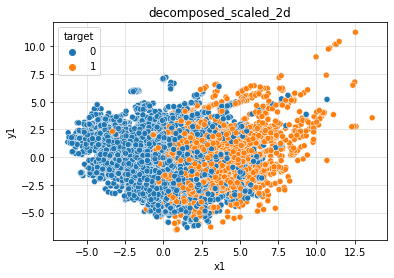

In [19]:
decomposed_scaled_2d = pd.concat([decomposed_scaled_df, 
                                  sample_df_d['target'].reset_index(drop=True)], axis=1)
sns.scatterplot(data=decomposed_scaled_2d, x='x1', y='y1', hue='target') 
plt.title('decomposed_scaled_2d')

plt.grid(alpha=0.4)
plt.show()

Now it is well expressed as a continuous variable. It can be seen that target-0 and target-1 can be distinguished to some extend only with D type variables.

In addition, let's check where the outlier(date) extracted earlier is located.

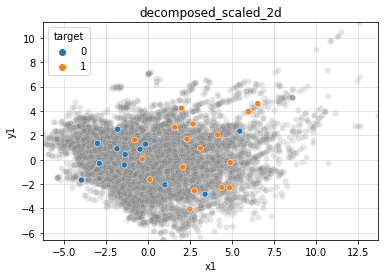

In [20]:
decomposed_scaled_2d = pd.concat([decomposed_scaled_df, 
                                  sample_df_d['target'].reset_index(drop=True), 
                                  sample_df_d.reset_index()['S_2'].isin(v_idx.index)], axis=1)
sns.scatterplot(data=decomposed_scaled_2d, x='x1', y='y1', color='grey', alpha=0.2)
sns.scatterplot(data=decomposed_scaled_2d[decomposed_scaled_2d['S_2']==True], x='x1', y='y1', hue='target')
plt.xlim((decomposed_scaled_2d['x1'].min(), decomposed_scaled_2d['x1'].max()))
plt.ylim((decomposed_scaled_2d['y1'].min(), decomposed_scaled_2d['y1'].max()))
plt.title('decomposed_scaled_2d')

plt.grid(alpha=0.4)
plt.show()

The points where the outliers exist are irregular and are not clustered in a specific location. This means that it is difficult to confirm information about outliers with at leat D-type data.

So. Chapter 1 of this tutorial is finished. By analyzing S-type, P-type, etc. in this way, we can determine which type of data best distributes the target category, and through it, we can select the variables we want to focus on little by little. In this tutorial, we only checked type D variables(column), but I hope you will actively check other type variabels in this way and share your insights in the comments.

Thanks for joining the tutorial!